# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [13]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=c534d196e1e9717277368983fcba320ffb93fc29bb665d1ca1d992c15df29ef3
  Stored in directory: c:\users\dasha\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [103]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE

import sklearn.preprocessing

In [532]:
import wget
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip'
wget.download(url)

In [104]:
df = pd.read_csv('data.txt.zip', header=None, dtype='float64')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001.0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001.0,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001.0,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001.0,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001.0,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [105]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
SS=sklearn.preprocessing.StandardScaler() #нормализуем данные с помощью StandartScaler
X = SS.fit_transform(X)
y = SS.fit_transform(y.reshape(-1,1))

val = df.sample(1000)

x_val = val.iloc[:, 1:].values
y_val = val.iloc[:, 0].values

x_val = SS.fit_transform(x_val)
y_val = SS.fit_transform(y_val.reshape(-1,1))

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [106]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()

In [107]:
ridge=ridge_model.fit(X_train , y_train)

In [108]:
ridge_predict = ridge.predict(X_test)

In [109]:
MSE(SS.inverse_transform(ridge_predict), SS.inverse_transform(y_test), squared=False)

9.49743491674954

Лучшей константной моделью для данной задачи будет прогноз, взятый как среднее всех значений

In [110]:
const = y_train.mean()

In [111]:
y_const_predict = np.full(len(y_test), const)

In [112]:
MSE(SS.inverse_transform(y_const_predict), SS.inverse_transform(y_test), squared=False)

10.837941817414041

Как видим, хоть и ненамного, но меньшую ошибку дает Ridge-регрессия. Далее с помощью полносвязной нейронной сети будем получать лучшее качество.

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [113]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [114]:
class RegressionDataset(torch.utils.data.Dataset): #класс для создания train_ test_ set
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": self.x[idx, :], "target": self.y[idx]}

In [115]:
def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    predicts = []
    with torch.no_grad(): #считаем качество, потому без градиентов
        model.eval()
        for test_batch in test_loader:
            batch_x = test_batch['sample']
            batch_y = test_batch['target'].reshape(len(test_batch['target']), 1) 
            y_pred = model(batch_x)                # делаем предсказания        
            y_pred=y_pred.clone().detach()  
            predicts.append(y_pred)
    predictions = torch.cat(predicts)
    return predictions

In [117]:
def train(model, optimizer, criterion, train_loader, test_loader, val_loader, N): #прототип взят с первого семинара и адаптирован под задачу
    """
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        train_loader - torch.utils.data.Dataloader with val_set (from train set get 1000 elements)
        N - number of epoches
    """
    test_losses=[]
    val_losses=[]
    for epoch in tqdm(range(1, N+1)):
        print("epoch =", epoch)
        train_loss_list=[]
        
        model.train()
        for batch in train_loader:    # берем батч из трейн лоадера
            batch['target'] = batch['target'].reshape(len(batch['target']), 1)
        
            y_pred = model(batch['sample'])                # делаем предсказания
            loss = criterion(batch['target'], y_pred) 
               
            loss.backward()                                # считаем градиенты обратным проходом
            optimizer.step()                               # обновляем параметры сети            
            optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
            
        val_losses.append(MSE(SS.inverse_transform(np.array(test(model, criterion, val_loader))), SS.inverse_transform(y_val), squared=False))
        #считаем ошибку на тренировочном датасете
        test_losses.append(MSE(SS.inverse_transform(np.array(test(model, criterion, test_loader))), SS.inverse_transform(y_test), squared=False))
        #считаем ошибку на тестовом датасете
        print("Train loss:", val_losses[-1]) #выводим ошибки
        print("Test loss:", test_losses[-1])
        if test_losses[-1] <8.75: break
    #Строим график зависимости лосса от эпохи
    plt.figure()
    x = np.linspace(1, N+1)
    plt.plot(test_losses, color="magenta")
    plt.plot(val_losses)
    plt.grid() 
    plt.legend(["Test_loss", "Train_loss"])
    plt.title("График зависимости лосса от времени(эпохи)")
    plt.xlabel("Эпоха")
    plt.ylabel("Лосс")
    plt.show()

Таким образом, получили модель, которая плавно сходится к ошибке в 8.5 на тестовой выборке.

Добавим еще один batchNorm и чуть увеличим шаг сходимости и число эпох

In [118]:
class ConvNet3(nn.Module): #создаем класс, унаследованный от nn.Module
    def __init__(self):
        super(ConvNet3, self).__init__()
        self.fc1 = nn.Linear(90, 64)
        self.bnm1 = nn.BatchNorm1d(64)            
        self.fc2 = nn.Linear(64, 26)
        self.bnm2 = nn.BatchNorm1d(26)
        self.fc3 = nn.Linear(26, 1)             
          
    def forward(self, x):                        # задаётся прямой проход
        x = self.fc1(x)                          # выход первого слоя
        x = self.bnm1(x)
        x = nn.ReLU()(x)                         # пропускаем через relu
        
        x = self.fc2(x)                          # выход второго слоя
        x = self.bnm2(x)
        x = nn.ReLU()(x)                         # пропускаем через relu
        
        x = self.fc3(x)                          # выход третьего слоя

        return x

epoch = 1
Train loss: 8.99680094699802
Test loss: 8.936809699051917
epoch = 2
Train loss: 8.804189784442407
Test loss: 8.856933044350372
epoch = 3
Train loss: 8.777428901763534
Test loss: 8.835628977654052
epoch = 4
Train loss: 8.79830928235362
Test loss: 8.80661728106289
epoch = 5
Train loss: 8.770218210751604
Test loss: 8.7851841236158
epoch = 6
Train loss: 8.794464378428014
Test loss: 8.793310383855081
epoch = 7
Train loss: 8.753241453050688
Test loss: 8.811596420352979
epoch = 8
Train loss: 8.715881765658649
Test loss: 8.789398163118728
epoch = 9
Train loss: 8.740823351750178
Test loss: 8.779174271751332
epoch = 10
Train loss: 8.630363597354465
Test loss: 8.791801236021705
epoch = 11
Train loss: 8.590128533164604
Test loss: 8.782076999415082
epoch = 12
Train loss: 8.614162585445797
Test loss: 8.768955625617737
epoch = 13
Train loss: 8.568778254197538
Test loss: 8.780344353564304
epoch = 14
Train loss: 8.58407345467393
Test loss: 8.811383661948136
epoch = 15
Train loss: 8.5425324178

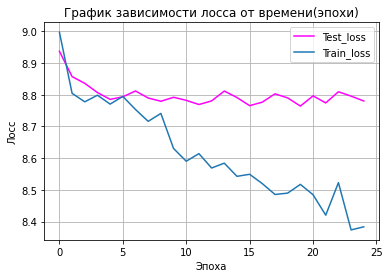

In [120]:
set_random_seed(1)
#строим итоговую модель на всем тренировочном датасете
train_set = RegressionDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_set = RegressionDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
val_set = RegressionDataset(torch.FloatTensor(x_val), torch.FloatTensor(y_val))

val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

model = ConvNet3()
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.00018) #оптимизатор

train(model, optimizer, criterion, train_dataloader, test_dataloader,val_dataloader,  25)

Ошибки в <8.75 достигнуть не удалось, однако значение <8.77 достигалось пару раз: в эпохах 12, 16.

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.
______

В работе использована трехслойная нейронная сеть, после каждого слоя применяется ReLU-функция в качестве функции активации для того, чтобы градиент не затухал, и после первых двух слоев - batchnorm. Сама модель приведена выше.
Гиперпараметры: шаг оптимизатора lr (чем больше - тем проще "проскочить" момент, когда модель обучилась "хорошо", и получить переобучение),
количество эпох N (чем больше эпох, тем дольше модель обучается), размер батчей batch_size.

Первой моделью, которуя я построила, была двухслойная нейронная сеть с одной функцией активации ReLU. Однако даже ошибки в 8.90 получить с ней не удалось - модель нуждалась в лучшем обучении

In [121]:
class ConvNet0(nn.Module): #создаем класс, унаследованный от nn.Module
    def __init__(self):
        super(ConvNet0, self).__init__()
        self.fc1 = nn.Linear(90, 64)            
        self.fc2 = nn.Linear(64, 1)        
          
    def forward(self, x):                        # задаётся прямой проход
        x = self.fc1(x)                          # выход первого слоя
        x = nn.ReLU()(x)                         # пропускаем через relu
        x = self.fc2(x)                          # выход второго слоя

        return x

Размер батчей использован везде =64 и шаг в 0.0001. При таких гиперпараметрах модель не "проскакивает" момент стабилизации ошибки, поэтому я смогла сосредоточиться на исследовании самой нейросети.

epoch = 1
Train loss: 9.18640655657499
Test loss: 9.124923165719043
epoch = 2
Train loss: 9.093454537955791
Test loss: 9.0629167460196
epoch = 3
Train loss: 9.057513776281596
Test loss: 9.024415103366753
epoch = 4
Train loss: 8.996085245920188
Test loss: 9.007650823344756
epoch = 5
Train loss: 8.97846799953676
Test loss: 8.992724363707307
epoch = 6
Train loss: 8.934815061387669
Test loss: 8.986424223678863
epoch = 7
Train loss: 8.916657985410724
Test loss: 8.98081130035359
epoch = 8
Train loss: 8.896188275304121
Test loss: 8.97376168220152
epoch = 9
Train loss: 8.911955716925448
Test loss: 8.954428246605024
epoch = 10
Train loss: 8.833709410423635
Test loss: 8.963521267038919
epoch = 11
Train loss: 8.819979767626485
Test loss: 8.95825656885898
epoch = 12
Train loss: 8.827110950587459
Test loss: 8.944601404238153
epoch = 13
Train loss: 8.807009077847916
Test loss: 8.939689777063531
epoch = 14
Train loss: 8.806646641447271
Test loss: 8.935957331939553
epoch = 15
Train loss: 8.80504729351

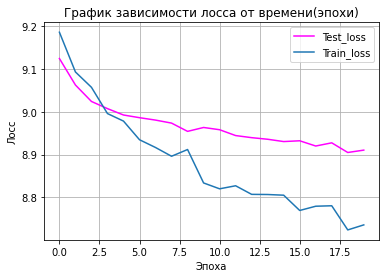

In [123]:
train_set = RegressionDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
val_set = RegressionDataset(torch.FloatTensor(x_val), torch.FloatTensor(y_val))
test_set = RegressionDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
set_random_seed(1)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

model = ConvNet0()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) #оптимизатор

set_random_seed(1)
train(model, optimizer, criterion, train_dataloader, test_dataloader, val_dataloader, 20)

Далее был добавлен третий полносвязный слой и функция активации для избежания затухания градиента. Качество улучшилось, но недостаточно.

In [124]:
class ConvNet1(nn.Module): #создаем класс, унаследованный от nn.Module
    def __init__(self):
        super(ConvNet1, self).__init__()
        self.fc1 = nn.Linear(90, 64)            
        self.fc2 = nn.Linear(64, 26)             
        self.fc3 = nn.Linear(26, 1)             
          
    def forward(self, x):                        # задаётся прямой проход
        x = self.fc1(x)                          # выход первого слоя
        x = nn.ReLU()(x)                         # пропускаем через relu
        x = self.fc2(x)                          # выход второго слоя
        x = nn.ReLU()(x)                         # пропускаем через relu
        x = self.fc3(x)                          # выход третьего слоя

        return x

epoch = 1
Train loss: 9.094762461715655
Test loss: 9.023576986790944
epoch = 2
Train loss: 8.880988602991895
Test loss: 8.929928045212636
epoch = 3
Train loss: 8.800257226856678
Test loss: 8.892681262393447
epoch = 4
Train loss: 8.756255777084478
Test loss: 8.863732848232015
epoch = 5
Train loss: 8.742119629033974
Test loss: 8.842425947603418
epoch = 6
Train loss: 8.709081155242227
Test loss: 8.836385867045164
epoch = 7
Train loss: 8.72053165175024
Test loss: 8.829775044153841
epoch = 8
Train loss: 8.683709461721357
Test loss: 8.827095828615246
epoch = 9
Train loss: 8.719771368156206
Test loss: 8.820455132028904
epoch = 10
Train loss: 8.60611013430239
Test loss: 8.840349619263145
epoch = 11
Train loss: 8.599267897256208
Test loss: 8.828993421108414
epoch = 12
Train loss: 8.634843151362306
Test loss: 8.825547745250061
epoch = 13
Train loss: 8.63172311168379
Test loss: 8.817171166487112
epoch = 14
Train loss: 8.569941333086364
Test loss: 8.858857938794168
epoch = 15
Train loss: 8.5724614

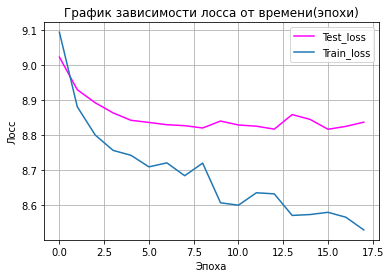

In [125]:
set_random_seed(1)
#строим модель на всем тренировочном датасете
train_set = RegressionDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_set = RegressionDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
val_set = RegressionDataset(torch.FloatTensor(x_val), torch.FloatTensor(y_val))

val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

model = ConvNet1()
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) #оптимизатор

train(model, optimizer, criterion, train_dataloader, test_dataloader,val_dataloader,  18)

И затем я стала добавлять batchnorm. Сначала добавила один и качество улучшилось, затем (уже в части 1) второй batchnorm и получила необходимое качество.

In [126]:
class ConvNet2(nn.Module): #создаем класс, унаследованный от nn.Module
    def __init__(self):
        super(ConvNet2, self).__init__()
        self.fc1 = nn.Linear(90, 64)            
        self.fc2 = nn.Linear(64, 26)
        self.bnm2 = nn.BatchNorm1d(26)
        self.fc3 = nn.Linear(26, 1)             
          
    def forward(self, x):                        # задаётся прямой проход
        x = self.fc1(x)                          # выход первого слоя
        x = nn.ReLU()(x)                         # пропускаем через relu
        x = self.fc2(x)                          # выход второго слоя
        x = self.bnm2(x)

        x = nn.ReLU()(x)                         # пропускаем через relu
        x = self.fc3(x)                          # выход третьего слоя

        return x

epoch = 1
Train loss: 9.060034189171741
Test loss: 9.015047191333515
epoch = 2
Train loss: 8.837480941675024
Test loss: 8.909563137910219
epoch = 3
Train loss: 8.805117242082371
Test loss: 8.87136358519265
epoch = 4
Train loss: 8.798821112971417
Test loss: 8.84995538447884
epoch = 5
Train loss: 8.805567046783546
Test loss: 8.833165674524702
epoch = 6
Train loss: 8.774175785210172
Test loss: 8.82367746801032
epoch = 7
Train loss: 8.768560032252484
Test loss: 8.834760742771028
epoch = 8
Train loss: 8.754060735858598
Test loss: 8.815605521063008
epoch = 9
Train loss: 8.73411810859096
Test loss: 8.797534764407265
epoch = 10
Train loss: 8.656267632449262
Test loss: 8.814855043050947
epoch = 11
Train loss: 8.633828919931297
Test loss: 8.811757907242098
epoch = 12
Train loss: 8.710017343983663
Test loss: 8.801930300502812
epoch = 13
Train loss: 8.679437702311562
Test loss: 8.793405095217523
epoch = 14
Train loss: 8.626337782506333
Test loss: 8.808319047601344
epoch = 15
Train loss: 8.61880586

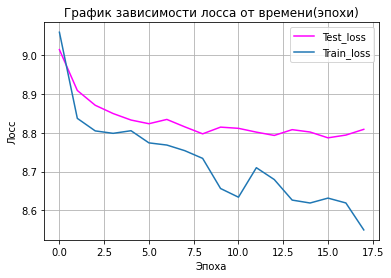

In [127]:
set_random_seed(1)
#строим модель на всем тренировочном датасете
train_set = RegressionDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_set = RegressionDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
val_set = RegressionDataset(torch.FloatTensor(x_val), torch.FloatTensor(y_val))

val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

model = ConvNet2()
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) #оптимизатор

train(model, optimizer, criterion, train_dataloader, test_dataloader,val_dataloader,  18)

Дополнительный эксперимент, чтобы оценить влияние изменения размера батчей на результаты.

Попробуем поменять размер батчей и посмотрим, как это отразится на результатах:

epoch = 1
Train loss: 9.313136146482387
Test loss: 9.23925851859637
epoch = 2
Train loss: 9.19311948338128
Test loss: 9.12433499057773
epoch = 3
Train loss: 9.128923555374882
Test loss: 9.074816037390022
epoch = 4
Train loss: 9.081311224120162
Test loss: 9.049311403391041
epoch = 5
Train loss: 9.05590526406282
Test loss: 9.039567615300074
epoch = 6
Train loss: 9.02819685934362
Test loss: 9.02696342594285
epoch = 7
Train loss: 9.032358162217271
Test loss: 9.016234759216978
epoch = 8
Train loss: 9.012764911608974
Test loss: 9.00971246215297
epoch = 9
Train loss: 9.01509549850613
Test loss: 8.996788938872507
epoch = 10
Train loss: 8.965272841023443
Test loss: 9.001757612244443
epoch = 11
Train loss: 8.945499479146228
Test loss: 8.990581238243559
epoch = 12
Train loss: 8.937522540837653
Test loss: 8.984087802296964
epoch = 13
Train loss: 8.92108054276516
Test loss: 8.979563479865146
epoch = 14
Train loss: 8.903755834168667
Test loss: 8.970700291057666
epoch = 15
Train loss: 8.9167546120874

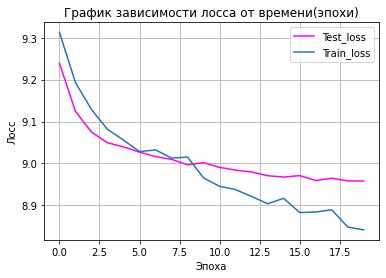

In [130]:
train_set = RegressionDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
val_set = RegressionDataset(torch.FloatTensor(x_val), torch.FloatTensor(y_val))
test_set = RegressionDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
set_random_seed(1)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=250, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=250, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=250, shuffle=False)

model = ConvNet0()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) #оптимизатор

set_random_seed(1)
train(model, optimizer, criterion, train_dataloader, test_dataloader, val_dataloader, 20)

Вывод: при увеличении только этого параетра качество ухудшилось. Вероятно, при большем батче модель нужно обучать большее число эпох либо задавать шаг lr побольше. Но поскольку с 64 всё налажено, то в этой работе я работала именно с таким batch_size.